# Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos

## PARTE A - Transformación de Datos

### A.1 Consideraciones iniciales

En primer lugar importamos las librerias de numpy, pandas, seaborn y matplotlib para iniciar el análisis exploratorio de datos, asi como sklearn para trabajar con los modelos de árboles de decisión y K vecinos más cercanos

In [ ]:
## Importamos las librerias para realizar EDA

import numpy as np
import pandas as pd
import seaborn as sns
sns.set() 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

from sklearn.metrics import mean_squared_error

Procedemos a abrir el dataset de Properati, y usar la función .shape para conocer la cantidad filas y columnas y .head() para ver las instancias. Se observa que hay 146660 filas y 19 columnas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/data/DS_Proyecto_01_Datos_Properati.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_properati = pd.read_csv(path)

In [ ]:
print(data_properati.shape)
data_properati.head()

(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta



Revisamos los nombres de las columnas y la cantidad de elementos nulos en cada una


In [ ]:
print(data_properati.columns) #Con la función .columns se imprimen los nombres de las columnas
print()
data_properati.isna().sum()   #Con las funciones .isna y sum podemos obtener la cantidad de valores faltantes por columna

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')



start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

En el Proyecto 1 se hizo el análisis de Machine Learning para los Departamentos, Casas y PH en Capital Federal, por lo tanto seleccionamos solamente esos datos del dataset principal

In [ ]:
# Seleccionando solo los datos de Capital Federal, para los tipos de propiedades Departamento, Casa y PH

df = data_properati.loc[(data_properati.l2 == 'Capital Federal') & 
    ((data_properati.property_type == 'Departamento')  | 
    (data_properati.property_type == 'Casa') | (data_properati.property_type == 'PH'))] 

print(df.shape)


(91485, 19)


Se procede a eliminar las siguientes columnas del dataset:

* 'start_date', 'end_date','created_on': Son atributos de fecha de publicación, que no forman parte de las características de las propiedades a estudiar.

* 'l1': Describe el pais. En este caso solamente hay propiedades en Argentina.

* 'l2': Describe la zona donde se encuentran las propiedades (Capital Federal y zonas norte, sur, oeste del GBA). Solamente nos interesan las propiedades en Capital Federal.

* 'l3': Indica los barrios en los que se encuentran las propiedades. Para este análisis no serán incluidas ya que no son variables numéricas y adicionalmente contamos con las columnas 'lat' y 'lon' las cuales caracterizan la ubicación de las propiedades.

* 'currency': Indica la moneda. En este caso solo hay USD.

* 'title': Texto relacionado con las características de las propiedades.

* 'description': Texto que describe las características de las propiedades.

* 'operation_type': Indica el tipo de transacción. En este dataset solo hay Venta

In [ ]:
# Se descartan las columnas start_date, end_date, created_on, l1, l2, l3, currency, title, description y operation type

df = df.drop(columns=['start_date','end_date','created_on','l1','l2','l3','currency','title','description','operation_type'])

print(df.shape)
print(df.isna().sum())
df.head()

(91485, 9)
lat                4534
lon                4548
rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
dtype: int64


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [ ]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,86951.000000,86937.000000,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,-34.599081,-58.436002,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,0.023957,0.036297,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,-34.696419,-58.530468,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,-34.613757,-58.459605,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,-34.599446,-58.433789,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,-34.584148,-58.410143,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,-34.535818,-58.353930,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


Se realiza un diagrama de caja para la variable surface_total por cada tipo de propiedad:

(0.0, 700.0)

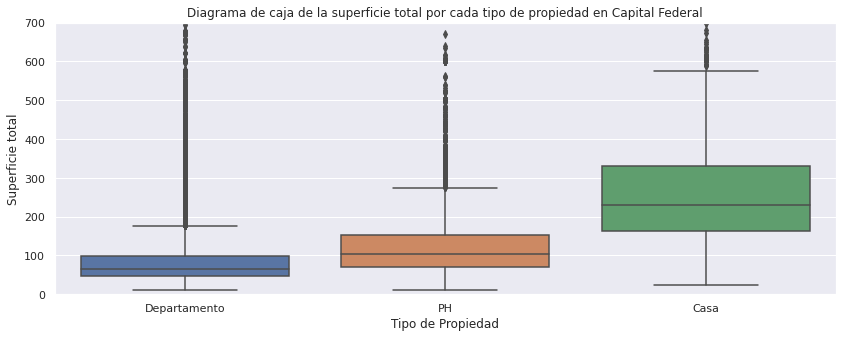

In [ ]:
# Se realiza un boxplot de la superficie total por tipo de propiedad 

# Diagrama de caja usando Seaborn

plt.figure(figsize=(14,5))
sns.boxplot(data = df, x = 'property_type', y = "surface_total")

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn

plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Diagrama de caja de la superficie total por cada tipo de propiedad en Capital Federal')
plt.ylim(0, 700)

Ahora realizamos el filtrado del dataset, seleccionando solamente aquellas propiedades con surface_covered menor o igual a surface_total

In [ ]:
# Filtrando propiedades: surface_covered debe ser menor o igual surface_total

df_1 = df.loc[df.surface_covered <= df.surface_total]
df_1

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146554,-34.585355,-58.427194,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,-34.585355,-58.427194,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,-34.584134,-58.436389,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,-34.583995,-58.417645,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


Con este dataset filtrado realizamos el diagrama de caja para la variable surface_total

(0.0, 700.0)

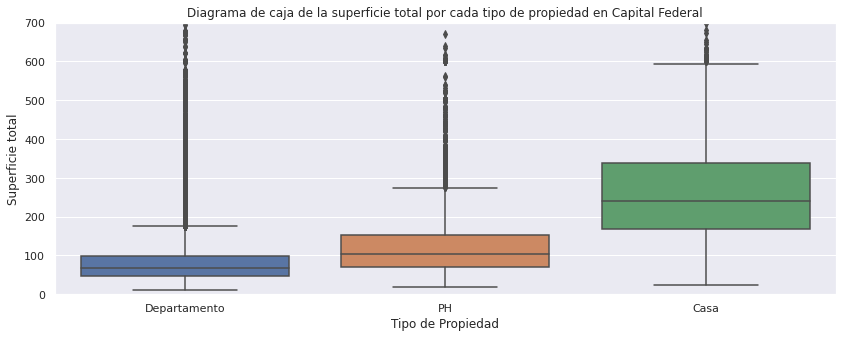

In [ ]:
# Diagrama de caja de la superficie total por cada tipo de propiedad (filtrado por surface_covered <= surface_total)

plt.figure(figsize=(14,5))

sns.boxplot(data = df_1, x = 'property_type', y = "surface_total")

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Superficie total')
plt.title('Diagrama de caja de la superficie total por cada tipo de propiedad en Capital Federal')
plt.ylim(0, 700)

### A.2 Detección y eliminación de Outliers 

Para hacer la detección y eliminación de outliers: Se filtra el dataset utilizando el criterio del rango intercuartílico (q75+1,5*IQR) para la variable surface_total:

In [ ]:
# Definimos los percentiles y el IQR de la superficie total para cada tipo de propiedad en Capital Federal

#Percentiles para los departamentos
q75, q25 = np.percentile((df_1.surface_total.loc[df_1.property_type == 'Departamento']), [75 ,25])
iqr = q75 - q25
lim_surf_dep = q75+1.5*iqr
print('Para departamentos:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_surf_dep)
print()

#Percentiles para los PH
q75, q25 = np.percentile((df_1.surface_total.loc[df_1.property_type == 'PH']), [75 ,25])
iqr = q75 - q25
lim_surf_ph = q75+1.5*iqr
print('Para PH:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_surf_ph)
print()

#Percentiles para las casas
q75, q25 = np.percentile((df_1.surface_total.loc[df_1.property_type == 'Casa']), [75 ,25])
iqr = q75 - q25
lim_surf_casa = q75+1.5*iqr
print('Para casas: ')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_surf_casa)
print()

Para departamentos:
iqr = 51.0 q75 = 99.0 q25 = 48.0
Limite superior: 175.5

Para PH:
iqr = 82.0 q75 = 152.0 q25 = 70.0
Limite superior: 275.0

Para casas: 
iqr = 170.5 q75 = 338.5 q25 = 168.0
Limite superior: 594.25



Descartando las instancias cuyos valores de surface_total son mayores a los respectivos límites superiores calculados, se obtiene el dataset "filter_surface_all" que consta de 75194 filas y 9 columnas

In [ ]:
# Filtrado de surface_total utilizando q75+1,5*IQR

filter_surface_all = (df_1.loc[((df_1.property_type == 'Departamento') & 
                 (df_1.surface_total < lim_surf_dep)) | ((df_1.property_type == 'PH') & 
                 (df_1.surface_total < lim_surf_ph)) | ((df_1.property_type == 'Casa') & 
                 (df_1.surface_total < lim_surf_casa))])

print(filter_surface_all.shape)

(75194, 9)


Se realiza un diagrama de caja para la variable price por cada tipo de propiedad:

(0.0, 900000.0)

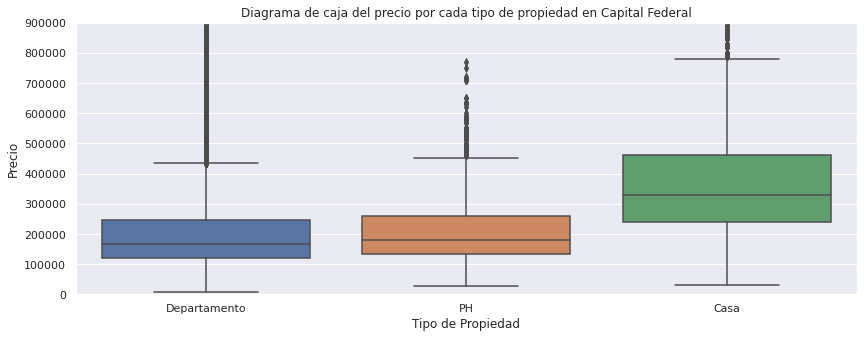

In [ ]:
# Diagrama de caja del precio por cada tipo de propiedad en Capital Federal

plt.figure(figsize=(14,5))

sns.boxplot(data = filter_surface_all, x = 'property_type', y = "price")

# Con estas instrucciones reemplazamos las etiquetas en los ejes que pone Seaborn
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio')
plt.title('Diagrama de caja del precio por cada tipo de propiedad en Capital Federal')
plt.ylim(0, 900000)

Para hacer la detección y eliminación de outliers: Se filtra el dataset utilizando el criterio del rango intercuartílico (q75+1,5*IQR) para la variable price:

In [ ]:
# Definimos los percentiles de precios para cada tipo de propiedad en Capital Federal

#Percentiles para los departamentos
q75, q25 = np.percentile((filter_surface_all.price.loc[filter_surface_all.property_type == 'Departamento']), [75 ,25])
iqr = q75 - q25
lim_price_dep = q75+1.5*iqr
print('Para departamentos:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_price_dep)
print()

#Percentiles para los PH
q75, q25 = np.percentile((filter_surface_all.price.loc[filter_surface_all.property_type == 'PH']), [75 ,25])
iqr = q75 - q25
lim_price_ph = q75+1.5*iqr
print('Para PH:')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_price_ph)
print()

#Percentiles para las casas
q75, q25 = np.percentile((filter_surface_all.price.loc[filter_surface_all.property_type == 'Casa']), [75 ,25])
iqr = q75 - q25
lim_price_casa = q75+1.5*iqr
print('Para casas: ')
print ( 'iqr =',iqr,'q75 =',q75,'q25 =',q25)
print('Limite superior:', lim_price_casa)
print()


Para departamentos:
iqr = 126000.0 q75 = 245000.0 q25 = 119000.0
Limite superior: 434000.0

Para PH:
iqr = 128000.0 q75 = 260000.0 q25 = 132000.0
Limite superior: 452000.0

Para casas: 
iqr = 219750.0 q75 = 459750.0 q25 = 240000.0
Limite superior: 789375.0



Descartando las instancias cuyos valores de la variable price son mayores a los respectivos límites superiores calculados, se obtiene el dataset "filter_surf_price" que consta de 70913 filas y 9 columnas

In [ ]:
# Filtrado de price utilizando q75+1,5*IQR

filter_surf_price = (filter_surface_all.loc[((filter_surface_all.property_type == 'Departamento') & 
                    (filter_surface_all.price < lim_price_dep)) | ((filter_surface_all.property_type == 'PH') & 
                    (filter_surface_all.price < lim_price_ph)) | ((filter_surface_all.property_type == 'Casa') & 
                    (filter_surface_all.price < lim_price_casa))])

print(filter_surf_price.shape)

(70913, 9)


### A.3 Valores nulos

Eliminamos las instancias con valores nulos, obteniendo el dataset "df_new" con 67078 filas y 9 columnas

In [ ]:
df_new = filter_surf_price.dropna()
df_new

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146543,-34.581699,-58.433547,3.0,2.0,2.0,85.0,81.0,225000.0,Departamento
146544,-34.587152,-58.437724,3.0,2.0,2.0,120.0,82.0,430000.0,Departamento
146545,-34.581425,-58.442707,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento
146549,-34.576573,-58.434394,3.0,2.0,1.0,84.0,84.0,178000.0,PH


### A.4 Encoding

Asignamos valores numericos a la columna property_type mediante la técnica de One Hot Encoding

In [ ]:
df_dummies = pd.get_dummies(df_new.property_type)
df_dummies 

,Casa,Departamento,PH
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
...,...,...,...
146543,0,1,0
146544,0,1,0
146545,0,1,0
146549,0,0,1


Al dataset "df_new" le agregamos las nuevas columnas obtenidas a través de One Hot Encoding, obteniendo el dataset "df_new_3" que es el que se usará para entrenar los modelos de árbol de decisión y k vecinos más cercanos

In [ ]:
df_new_2 = pd.concat([df_new,df_dummies],axis=1)
df_new_3 = df_new_2.drop(columns=['property_type'])

df_new_3 = df_new_3.reindex(columns=['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered',
                                     'Casa','Departamento','PH','price'])
df_new_3


,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,Casa,Departamento,PH,price
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,0,1,0,153000.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,0,0,1,159000.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,0,0,1,125000.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,0,0,1,295000.0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,0,0,1,150000.0
...,...,...,...,...,...,...,...,...,...,...,...
146543,-34.581699,-58.433547,3.0,2.0,2.0,85.0,81.0,0,1,0,225000.0
146544,-34.587152,-58.437724,3.0,2.0,2.0,120.0,82.0,0,1,0,430000.0
146545,-34.581425,-58.442707,3.0,2.0,2.0,88.0,82.0,0,1,0,399000.0
146549,-34.576573,-58.434394,3.0,2.0,1.0,84.0,84.0,0,0,1,178000.0


Calculamos la matriz de correlación para las columnas del dataset "df_new_3"

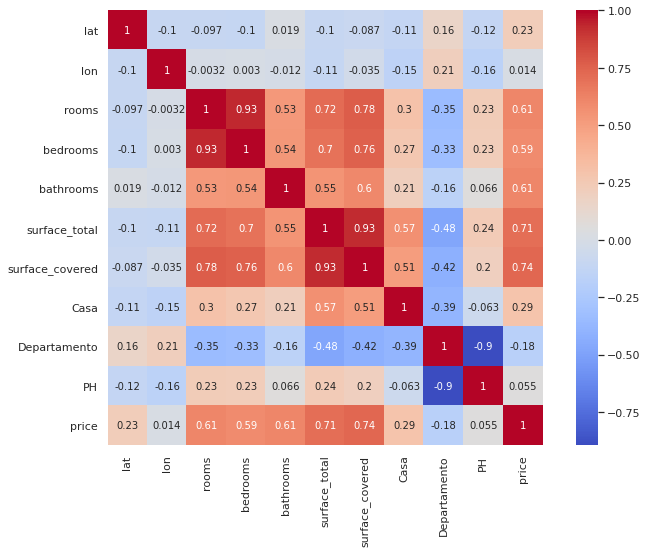

In [ ]:
corr= df_new_3.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True,cmap= 'coolwarm')
#plt.xticks(rotation = 45)
#plt.yticks(rotation = 45)
plt.show()

### A.5 Escalamiento 

Antes de aplicar los metodos de decisión y KNN, hacemos un escalamiento de los datos:

In [ ]:
X=df_new_3.drop(columns = ['price'])
y=df_new_3['price']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

Se realiza el train test split


In [ ]:
# La Variable X considera en este caso todas las columnas del dataset "df_new_3" excepto "price"
X = df_new_3.iloc[:,0:10]

# Variable y = price
y = df_new_3.iloc[:,10]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### A.6 Arbol de decisión

A continuación se procede a realizar un modelo de árbol de decisión con el dataset obtenido

In [ ]:
# Definimos el modelo de arbol de decisiones

# Empezamos importando la funcion DecisionTreeRegressor de la libreria SciKit Learn
from sklearn.tree import DecisionTreeRegressor

# Definimos las listas vacias para los valores de rmse deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_values = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de m 
for m in max_values:
        
    # Definir el modelo con el valor de max depth deseado
    tree_regressor = DecisionTreeRegressor(max_depth= m, random_state=42)
    
    # Entrenar el modelo
    tree_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de max depth, RMSE Train y RMSE Test   
zippedlist = list(zip(max_values, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['max_depth_values', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,max_depth_values,rmse_train,rmse_test
0,1,68726.53,68922.68
1,2,60808.24,60329.38
2,3,55026.34,54538.28
3,4,50302.02,50149.08
4,5,47425.11,47573.12
5,6,45153.78,45577.64
6,7,42684.94,43519.33
7,8,40186.90,41711.68
8,9,37468.42,40226.03
9,10,34803.51,38767.02


Text(0, 0.5, 'rmse')

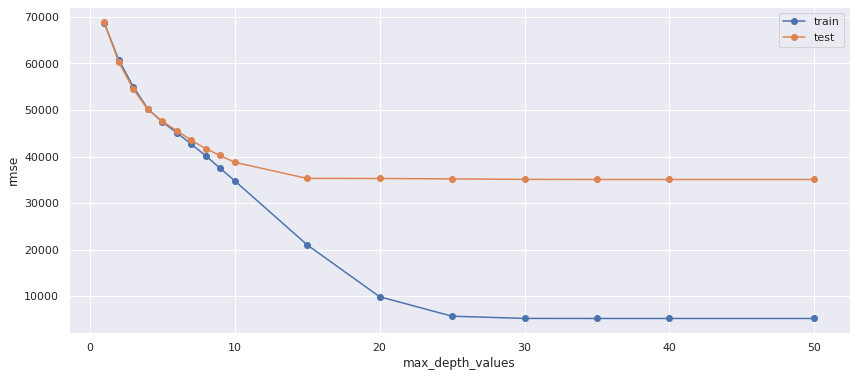

In [ ]:
# Se grafican los valores de RMSE vs max_depth para los sets Train y Test

plt.figure(figsize = (14,6))
plt.plot(max_values,lista_rmse_train,'o-',label='train' )
plt.plot(max_values,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('max_depth_values')
plt.ylabel('rmse')

### A.7 K vecinos más cercanos

Ahora aplicamos el metodo de K vecinos más cercanos


In [ ]:
# Definimos el modelo de k vecinos

# Empezamos importando la funcion KNeighborsRegressor de la libreria SciKit Learn

from sklearn.neighbors import KNeighborsRegressor

# Definimos las listas vacias para los valores de RMSE deseados
lista_rmse_train = []
lista_rmse_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos un loop sobre los distintos valores de k 
for k in k_vecinos:
      
    # Definir el modelo con el valor de vecinos deseado
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_regressor.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = knn_regressor.predict(X_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = knn_regressor.predict(X_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(train_rmse)
    lista_rmse_test.append(test_rmse)
    
#Se crea un dataframe para mostrar los valores de número de vecinos, RMSE Train y RMSE Test   
zippedlist = list(zip(k_vecinos, lista_rmse_train, lista_rmse_test))
df_rmse = pd.DataFrame(zippedlist, columns = ['n_neighbors', 'rmse_train', 'rmse_test'])
df_rmse = df_rmse.round(decimals=2)
df_rmse

,n_neighbors,rmse_train,rmse_test
0,1,7349.76,43947.23
1,2,22464.28,42480.69
2,3,28495.91,42097.63
3,4,32207.46,42438.45
4,5,34608.43,42828.11
5,6,36325.68,42935.09
6,7,37671.04,43483.65
7,8,38662.21,43594.52
8,9,39572.39,43871.74
9,10,40282.72,44213.57


Text(0, 0.5, 'RMSE')

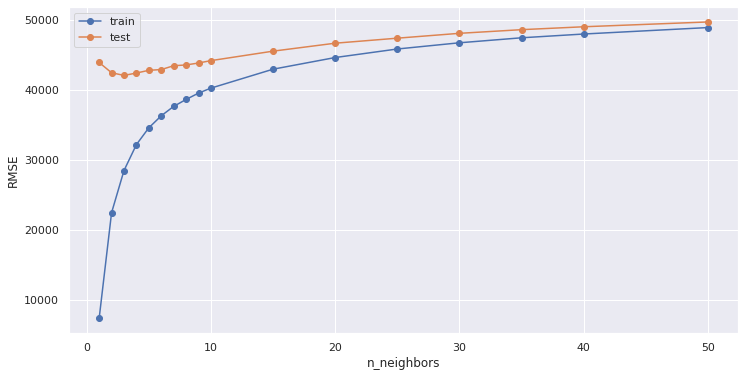

In [ ]:
# Se grafican los valores de RMSE vs numero de vecinos para los sets Train y Test

plt.figure(figsize = (12,6))
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test' )
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')

### A.8 Análisis

Al entrenar este nuevo dataset con los modelos de árbol de decisión y k vecinos más cercanos se observa que hubo una notable mejoría en la predicción del precio de las propiedades ya que los valores de RMSE disminuyeron con respecto a los modelos entrenados en el Proyecto 1. Para el árbol de decisión se obtuvo un RMSE = 35072.77 (max depth = 35) , para el modelo de K vecinos más cercanos un RMSE = 42097.63 (n_neighbors = 3), mientras que en el proyecto 1 se alcanzó un RMSE = 149649.08 (arbol de decisión con max depth =15).  Hay algunas diferencias que permiten explicar este comportamiento:

1. Eliminación de outliers: En el proyecto 1 al momento de aplicar los modelos de Machine Learning se descartaron las propiedades con menos de USD 4.000.000 y con superficie total menor a 15 m2 y mayor a 1000 m2. En el dataset actual "df_new_3" se aplicó el criterio del rango intercuartílico para eliminar valores de precio y superficie total mayores a 1.5 * IQR, obteniendo un dataset con un criterio de selección más estricto, lo cual disminuyó la influencia de los valores outliers en las predicciones de los modelos.

1. Encoding: En el dataset del Proyecto 1 no había ningun tipo de distinción en los datos según el tipo de propiedad. Mientras que el dataset actual incluye los atributos de Departamento, Casa y PH mediante la técnica del One Hot Encoding. 

1. Escalado de datos: Se aplicó la técnica de escalado o normalización de datos, para evitar que los distintos órdenes de magnitud de los datos puedan confundir al modelo de k vecinos más cercanos.



## PARTE B - Modelos Avanzados

En esta sección se evaluarán dos modelos avanzados: regresión lineal y random forest

### B.1 Regresión Lineal (benchmark)

Empezamos evaluando un modelo de Regresión Lineal sin atributos polinómicos ni regularización, para usarlo como benchmark

In [ ]:
from sklearn.linear_model import LinearRegression
reg_1 = LinearRegression()

In [ ]:
reg_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_pred_1 = reg_1.predict(X_train)
y_test_pred_1 = reg_1.predict(X_test)

Raíz del error cuadrático medio en Train: 50363.13380722575
Raíz del error cuadrático medio en Test: 50134.18654143342


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


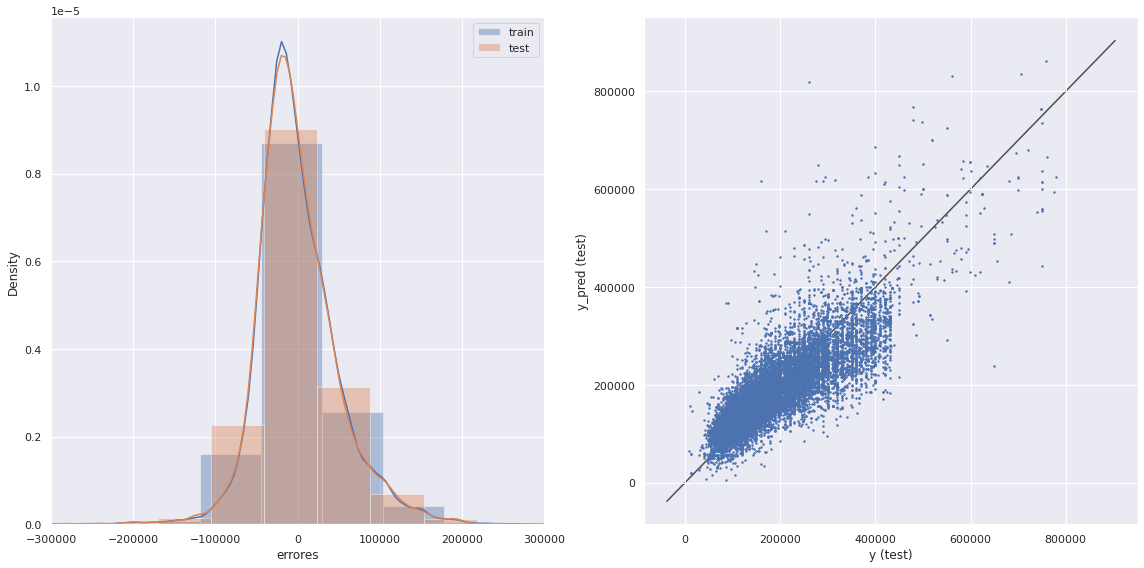

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_1))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_1, bins = 15, label = 'train')
sns.distplot(y_test - y_test_pred_1, bins = 15, label = 'test')
plt.xlim(-300000, 300000)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_1, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### B.2 Regresión lineal con atributos polinómicos y regularización

A continuación se calcularán los atributos polinómicos de grado 2, 3 y 4 para las variables predictoras X. Cada uno de estos atributos servirá de entrada para distintos modelos de regresión lineal con regularización Ridge y validación cruzada. 

Luego mediante un proceso iterativo se calculan los distintos valores de la métrica "neg_root_mean_squared_error", permitiendo obtener el mejor hiperparametro alpha para cada modelo Ridge. El conjunto de posibles hiperparámetros viene dado por la lista valores_alpha = [0.01, 0.1, 0.5, 0.75, 1, 10, 20] los cuales fueron escogidos manualmente de esa forma para poder visualizar gráficamente los cambios en la métrica a medida que cambia alpha.

Finalmente con el mejor valor de alpha para cada uno de los modelos se hace la predicción con los datos X_test, obteniendo el valor de RMSE mediante la comparación entre y_test con y_test_ridge.

**NOTA: Con el fin de hacer una comparacion directa entre la métrica RMSE obtenida en la proyecto 1 y el valor "neg_root_mean_squared_error" que arroja la clase cross_validation, tomaremos en consideración para el análisis solamente los valores absolutos, es decir sin el signo negativo. (RMSE = abs(neg_root_mean_squared_error)).**

### B.2.1 Atributos polinómicos desde grado 2 hasta grado 4

Se importa la clase correspondiente para calcular los atributos polinómicos:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

El data set a evaluar "df_new_3" tiene 10 columnas en X. Calculamos los atributos polinómicos de grado 2 para los conjuntos X_train y X_test, obteniendo 66 columnas

In [ ]:
poly = PolynomialFeatures(2)
X_train_2 = poly.fit_transform(X_train)
X_test_2 = poly.fit_transform(X_test)
print(X_train_2.shape, X_test_2.shape)

(46954, 66) (20124, 66)


Calculamos los atributos polinómicos de grado 3 para los conjuntos X_train y X_test, obteniendo 286 columnas

In [ ]:
poly = PolynomialFeatures(3)
X_train_3 = poly.fit_transform(X_train)
X_test_3 = poly.fit_transform(X_test)
print(X_train_3.shape, X_test_3.shape)

(46954, 286) (20124, 286)


Calculamos los atributos polinómicos de grado 4 para los conjuntos X_train y X_test, obteniendo 1001 columnas

In [ ]:
poly = PolynomialFeatures(4)
X_train_4 = poly.fit_transform(X_train)
X_test_4 = poly.fit_transform(X_test)
print(X_train_4.shape, X_test_4.shape)

(46954, 1001) (20124, 1001)


### B.2.2 Optimización de hiperparámetros para Ridge con atributos polinómicos de grado 2

Se importan las clases Ridge y cross_validate

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

Se obtienen los valores de "neg_root_mean_squared_error" para el modelo Ridge con validación cruzada usando atributos polinómicos de grado 2, iterando para cada valor de alpha

In [ ]:

ridge_train_scores_mean = []
ridge_train_scores_std = []
ridge_test_scores_mean = []
ridge_test_scores_std = []

valores_alpha =[0.01,0.1,0.5,0.75,1,10,20]

for alphas in valores_alpha:
    Ridge_poly_2= Ridge(alpha=alphas)
    ridge_scores = cross_validate(Ridge_poly_2, X_train_2, y_train, cv=5,scoring = 'neg_root_mean_squared_error', 
                                return_train_score=True, n_jobs = -1)
    
    ridge_train_scores_mean.append(ridge_scores['train_score'].mean())
    ridge_train_scores_std.append(ridge_scores['train_score'].std())
    
    ridge_test_scores_mean.append(ridge_scores['test_score'].mean())
    ridge_test_scores_std.append(ridge_scores['test_score'].std())

ridge_train_scores_mean = np.array(ridge_train_scores_mean)
ridge_train_scores_std = np.array(ridge_train_scores_std)
ridge_test_scores_mean = np.array(ridge_test_scores_mean)
ridge_test_scores_std = np.array(ridge_test_scores_std)

Se grafican los valores de "neg_root_mean_squared_error" para los conjuntos training y test

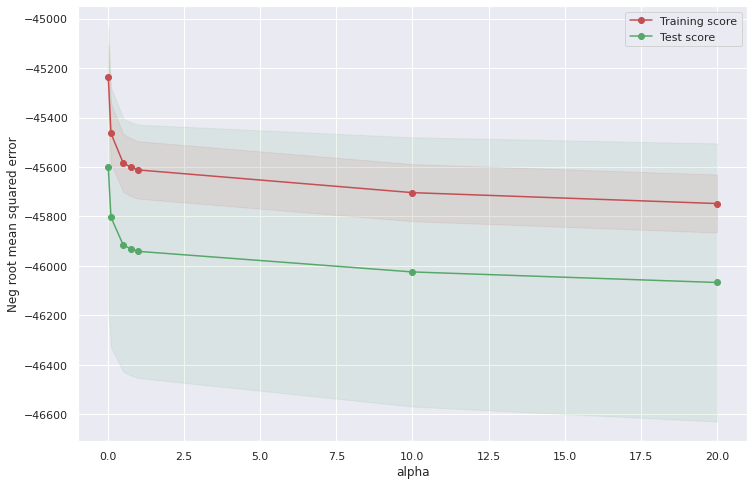

In [ ]:
plt.figure(figsize=(12,8))
plt.fill_between(valores_alpha, ridge_train_scores_mean - ridge_train_scores_std,
                 ridge_train_scores_mean + ridge_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(valores_alpha, ridge_test_scores_mean - ridge_test_scores_std,
                 ridge_test_scores_mean + ridge_test_scores_std, alpha=0.1, color="g")
plt.plot(valores_alpha, ridge_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(valores_alpha, ridge_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Neg root mean squared error')
plt.xlabel('alpha')
plt.show()

In [ ]:
ridge_test_scores_mean

array([-45601.05575653, -45803.35084351, -45915.1876183 , -45931.12812456,
       -45941.20269209, -46024.4342321 , -46067.07462958])

In [ ]:
ridge_train_scores_mean

array([-45234.01670285, -45464.21220572, -45583.56916852, -45600.83784639,
       -45611.88160725, -45703.68735387, -45747.75105008])

Con alpha=0.01 se obtiene el menor error para el conjunto test. Se procede a entrenar el modelo Ridge, para obtener las predicciones utilizando los datos train y test con atributos polinómicos de grado 2

In [ ]:
Ridge_poly_2 = Ridge(alpha=0.01)
Ridge_poly_2.fit(X_train_2, y_train)
y_train_pred_ridge_2 = Ridge_poly_2.predict(X_train_2)
y_test_pred_ridge_2 = Ridge_poly_2.predict(X_test_2)

Se calculan los respectivos valores de RMSE para las predicciones "y_train_pred_ridge_2" y "y_test_pred_ridge_2"

In [ ]:
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test,y_test_pred_ridge_2))

print ('Raíz del error cuadrático medio en Train:',rmse_train_2)
print ('Raíz del error cuadrático medio en Test:',rmse_test_2)

Raíz del error cuadrático medio en Train: 45245.918889286055
Raíz del error cuadrático medio en Test: 45149.127768925646


Graficamos la distribución de los errores en los conjuntos train y test

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


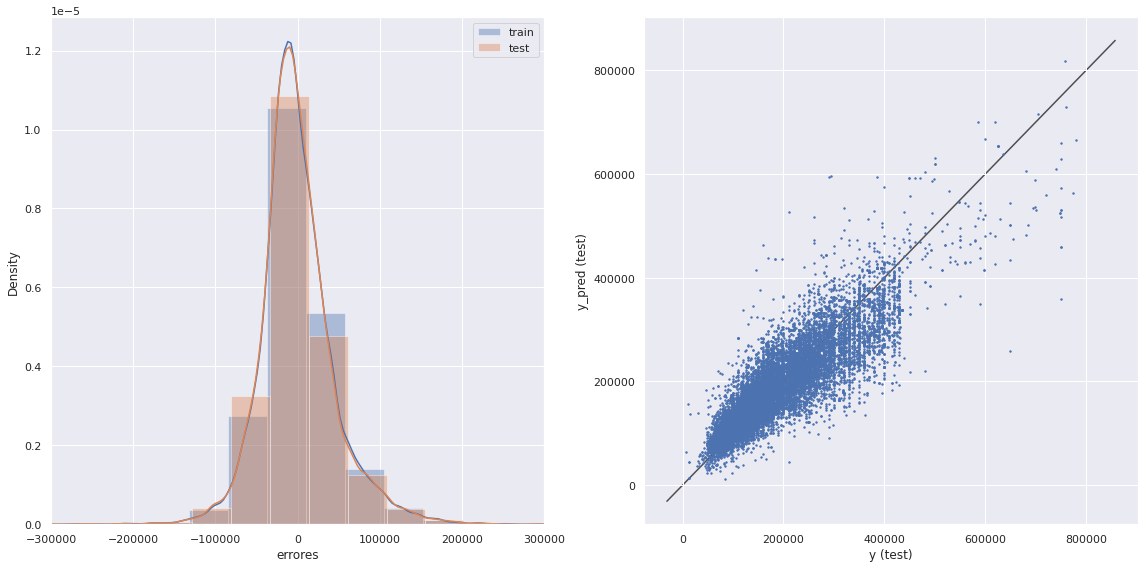

In [ ]:
# Graficando la distribución de errores

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_ridge_2, bins = 15, label = 'train')
sns.distplot(y_test - y_test_pred_ridge_2, bins = 15, label = 'test')
plt.xlim(-300000, 300000)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_ridge_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### B.2.3 Optimización de hiperparámetros para Ridge con atributos polinómicos de grado 3

Se obtienen los valores de "neg_root_mean_squared_error" para el modelo Ridge con validación cruzada usando atributos polinómicos de grado 3, iterando para cada valor de alpha

In [ ]:

ridge_train_scores_mean = []
ridge_train_scores_std = []
ridge_test_scores_mean = []
ridge_test_scores_std = []

valores_alpha =[0.01,0.1,0.5,0.75,1,10,20]

for alphas in valores_alpha:
    Ridge_poly_3= Ridge(alpha=alphas)
    ridge_scores = cross_validate(Ridge_poly_3, X_train_3, y_train, 
                    cv=5,scoring = 'neg_root_mean_squared_error', 
                    return_train_score=True, n_jobs = -1)
    
    ridge_train_scores_mean.append(ridge_scores['train_score'].mean())
    ridge_train_scores_std.append(ridge_scores['train_score'].std())
    
    ridge_test_scores_mean.append(ridge_scores['test_score'].mean())
    ridge_test_scores_std.append(ridge_scores['test_score'].std())

ridge_train_scores_mean = np.array(ridge_train_scores_mean)
ridge_train_scores_std = np.array(ridge_train_scores_std)
ridge_test_scores_mean = np.array(ridge_test_scores_mean)
ridge_test_scores_std = np.array(ridge_test_scores_std)

Se grafican los valores de "neg_root_mean_squared_error" para los conjuntos training y test

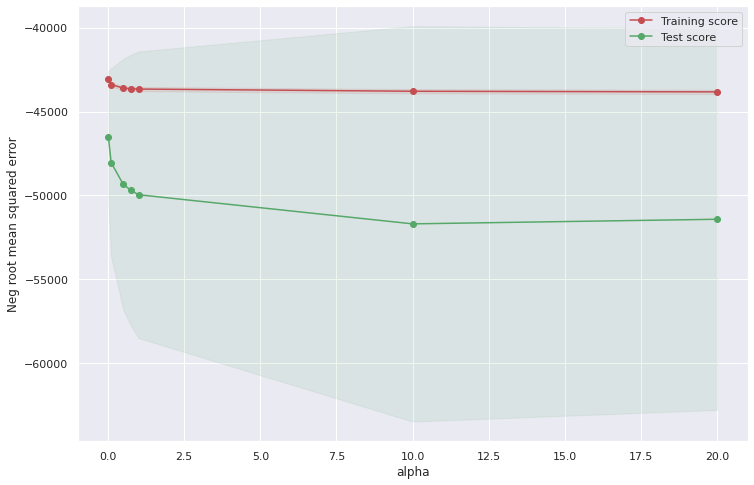

In [ ]:
plt.figure(figsize=(12,8))
plt.fill_between(valores_alpha, ridge_train_scores_mean - ridge_train_scores_std,
                 ridge_train_scores_mean + ridge_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(valores_alpha, ridge_test_scores_mean - ridge_test_scores_std,
                 ridge_test_scores_mean + ridge_test_scores_std, alpha=0.1, color="g")
plt.plot(valores_alpha, ridge_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(valores_alpha, ridge_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Neg root mean squared error')
plt.xlabel('alpha')
plt.show()

In [ ]:
ridge_test_scores_mean

array([-46498.88710861, -48041.21719528, -49345.75611482, -49700.18602587,
       -49962.4172035 , -51697.39394294, -51422.94301174])

In [ ]:
ridge_train_scores_mean

array([-43053.96387826, -43394.79165986, -43606.05593226, -43640.2593671 ,
       -43661.33825899, -43793.1446026 , -43830.07272705])

Con alpha=0.01 se obtiene el menor error para el conjunto test. Se procede a entrenar el modelo Ridge, para obtener las predicciones utilizando los datos train y test con atributos polinómicos de grado 3

In [ ]:
Ridge_poly_3 = Ridge(alpha=0.01)
Ridge_poly_3.fit(X_train_3, y_train)
y_train_pred_ridge_3 = Ridge_poly_3.predict(X_train_3)
y_test_pred_ridge_3 = Ridge_poly_3.predict(X_test_3)

Se calculan los respectivos valores de RMSE para las predicciones "y_train_pred_ridge_3" y "y_test_pred_ridge_3"

In [ ]:
rmse_train_3 = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge_3))
rmse_test_3 = np.sqrt(mean_squared_error(y_test,y_test_pred_ridge_3))

print ('Raíz del error cuadrático medio en Train:',rmse_train_3)
print ('Raíz del error cuadrático medio en Test:',rmse_test_3)

Raíz del error cuadrático medio en Train: 43097.68380990329
Raíz del error cuadrático medio en Test: 43532.84964696368


Graficamos la distribución de los errores en los conjuntos train y test

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


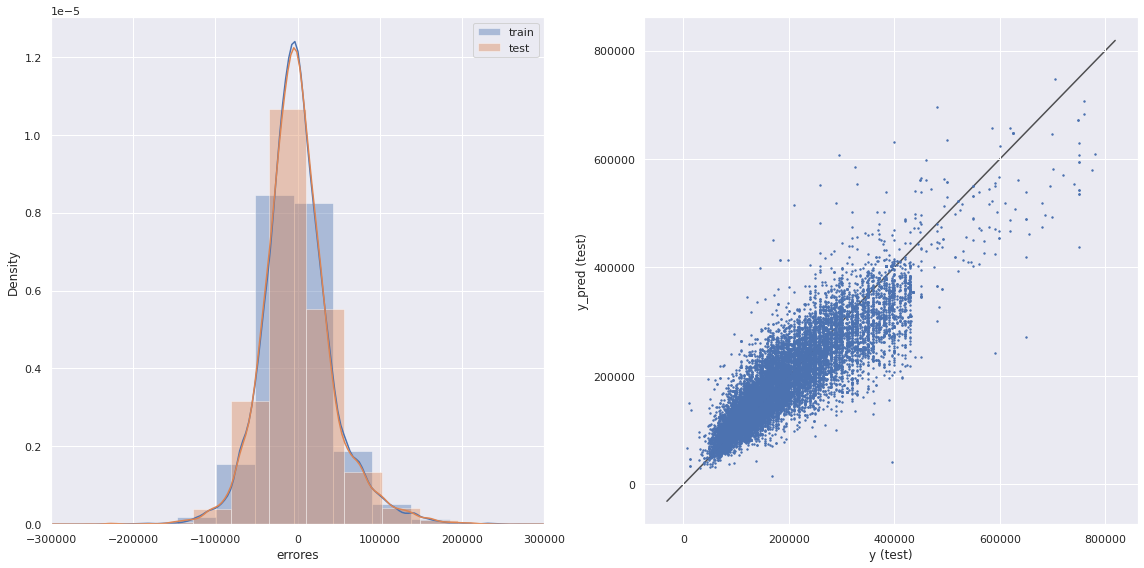

In [ ]:
# Graficando la distribución de errores

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_ridge_3, bins = 15, label = 'train')
sns.distplot(y_test - y_test_pred_ridge_3, bins = 15, label = 'test')
plt.xlim(-300000, 300000)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_ridge_3, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### B.2.3 Optimización de hiperparámetros para Ridge con atributos polinómicos de grado 4

Se obtienen los valores de "neg_root_mean_squared_error" para el modelo Ridge con validación cruzada usando atributos polinómicos de grado 4, iterando para cada valor de alpha

In [ ]:

ridge_train_scores_mean = []
ridge_train_scores_std = []
ridge_test_scores_mean = []
ridge_test_scores_std = []

valores_alpha =[0.01,0.1,0.5,0.75,1,10,20]

for alphas in valores_alpha:
    Ridge_poly_4= Ridge(alpha=alphas)
    ridge_scores = cross_validate(Ridge_poly_4, X_train_4, y_train, cv=5,scoring = 'neg_root_mean_squared_error', 
                                return_train_score=True, n_jobs = -1)
    
    ridge_train_scores_mean.append(ridge_scores['train_score'].mean())
    ridge_train_scores_std.append(ridge_scores['train_score'].std())
    
    ridge_test_scores_mean.append(ridge_scores['test_score'].mean())
    ridge_test_scores_std.append(ridge_scores['test_score'].std())

ridge_train_scores_mean = np.array(ridge_train_scores_mean)
ridge_train_scores_std = np.array(ridge_train_scores_std)
ridge_test_scores_mean = np.array(ridge_test_scores_mean)
ridge_test_scores_std = np.array(ridge_test_scores_std)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
ridge_test_scores_mean

array([-226183.55339593, -265231.00145123, -292914.89372298,
       -298716.87398358, -302365.98669991, -324190.67490061,
       -326941.3367576 ])

In [ ]:
ridge_train_scores_mean

array([-41299.89080748, -41391.98354832, -41514.78198343, -41564.1639826 ,
       -41602.32631605, -41864.77101857, -41920.13985242])

Se grafican los valores de "neg_root_mean_squared_error" para los conjuntos training y test

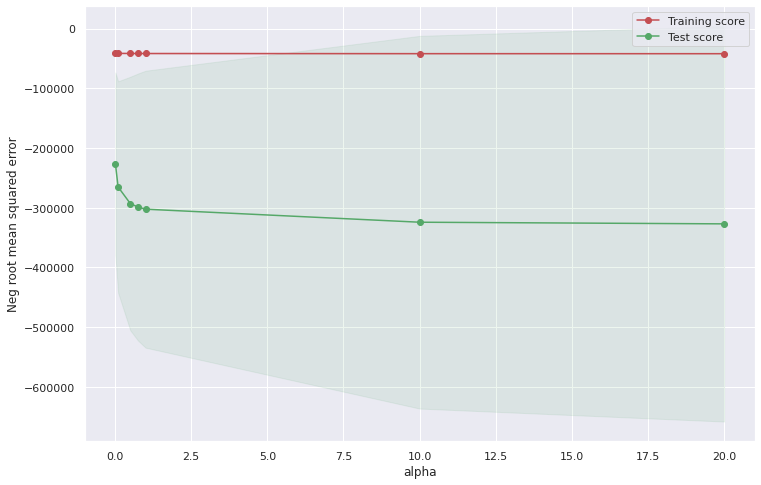

In [ ]:
plt.figure(figsize=(12,8))
plt.fill_between(valores_alpha, ridge_train_scores_mean - ridge_train_scores_std,
                 ridge_train_scores_mean + ridge_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(valores_alpha, ridge_test_scores_mean - ridge_test_scores_std,
                 ridge_test_scores_mean + ridge_test_scores_std, alpha=0.1, color="g")
plt.plot(valores_alpha, ridge_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(valores_alpha, ridge_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Neg root mean squared error')
plt.xlabel('alpha')
plt.show()

Con alpha=0.01 se obtiene el menor error para el conjunto test. Se procede a entrenar el modelo Ridge, para obtener las predicciones utilizando los datos train y test con atributos polinómicos de grado 4

In [ ]:
Ridge_poly_4 = Ridge(alpha=0.01)
Ridge_poly_4.fit(X_train_4, y_train)
y_train_pred_ridge_4 = Ridge_poly_4.predict(X_train_4)
y_test_pred_ridge_4 = Ridge_poly_4.predict(X_test_4)

Se calculan los respectivos valores de RMSE para las predicciones "y_train_pred_ridge_4" y "y_test_pred_ridge_4"

In [ ]:
rmse_train_4 = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge_4))
rmse_test_4 = np.sqrt(mean_squared_error(y_test,y_test_pred_ridge_4))

print ('Raíz del error cuadrático medio en Train:',rmse_train_4)
print ('Raíz del error cuadrático medio en Test:',rmse_test_4)

Raíz del error cuadrático medio en Train: 41480.13417122947
Raíz del error cuadrático medio en Test: 49612.43306799222


Graficamos la distribución de los errores en los conjuntos train y test

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


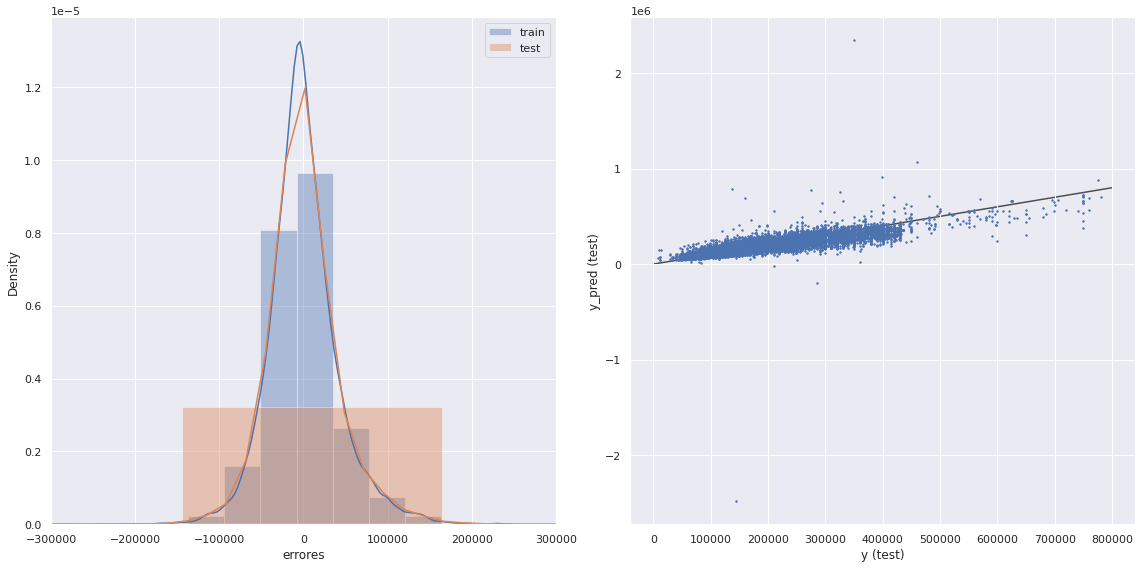

In [ ]:
# Graficando la distribución de errores

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_ridge_4, bins = 15, label = 'train')
sns.distplot(y_test - y_test_pred_ridge_4, bins = 15, label = 'test')
plt.xlim(-300000, 300000)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_ridge_4, s =2)

ax.plot((0,800000), (0,800000), 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### B.3 Evaluando modelo de Random Forest con Random Search

Se importan las clases RandomizedSearchCV y RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

Creamos el objeto Random Forest llamado "rf_reg"

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)

Se define la grilla de hiperparámetros, a partir de los cuales se hará una búsqueda aleatoria

In [ ]:
# Grilla para Random Search
param_grid = {'n_estimators':[50,100,200,500,1000], 'max_depth':[10,20,50,100,500,1000]}

In [ ]:
model = RandomizedSearchCV(rf_reg, param_grid,
        n_iter=10, random_state=42, cv=5)


# Entrenamos: Random Forest con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
print("Mejores parametros: "+str(model.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor Score: "+str(model.best_score_)+'\n')    # Indica el mejor score

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'n_estimators': 1000, 'max_depth': 500}
Mejor Score: 0.9045158123322465



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,27.928200,0.110066,0.635491,0.011689,200,1000,"{'n_estimators': 200, 'max_depth': 1000}",0.906177,0.907027,0.903954,0.899063,0.904110,0.904066,0.002766,4
1,7.369220,0.705736,0.163026,0.002519,50,100,"{'n_estimators': 50, 'max_depth': 100}",0.904785,0.905452,0.901393,0.896740,0.902840,0.902242,0.003103,9
2,70.254031,0.315362,1.598881,0.034035,500,500,"{'n_estimators': 500, 'max_depth': 500}",0.906427,0.907338,0.904456,0.899373,0.904602,0.904439,0.002759,2
3,27.869606,0.158573,0.629206,0.016372,200,100,"{'n_estimators': 200, 'max_depth': 100}",0.906177,0.907027,0.903954,0.899063,0.904110,0.904066,0.002766,4
4,67.979084,1.686749,1.446794,0.049953,500,20,"{'n_estimators': 500, 'max_depth': 20}",0.905448,0.906408,0.903166,0.898385,0.903474,0.903376,0.002773,8
5,134.293888,0.627326,2.893101,0.046194,1000,20,"{'n_estimators': 1000, 'max_depth': 20}",0.905567,0.906472,0.903157,0.898666,0.903379,0.903448,0.002705,7
6,70.371489,0.993086,1.662086,0.125319,500,1000,"{'n_estimators': 500, 'max_depth': 1000}",0.906427,0.907338,0.904456,0.899373,0.904602,0.904439,0.002759,2
7,139.824324,1.104322,3.218991,0.075019,1000,500,"{'n_estimators': 1000, 'max_depth': 500}",0.906562,0.907479,0.904333,0.899656,0.904549,0.904516,0.002706,1
8,27.882727,0.036492,0.620257,0.004643,200,50,"{'n_estimators': 200, 'max_depth': 50}",0.906177,0.907027,0.903954,0.899063,0.904110,0.904066,0.002766,4
9,4.292263,0.106249,0.056753,0.001480,50,10,"{'n_estimators': 50, 'max_depth': 10}",0.849858,0.844787,0.843382,0.842373,0.845959,0.845272,0.002596,10


In [ ]:
#Predecimos en los datos de train y test
prediction_train = model.predict(X_train)
prediction_test = model.predict(X_test)

In [ ]:
rmse_train_rf = np.sqrt(mean_squared_error(y_train,prediction_train))
rmse_test_rf = np.sqrt(mean_squared_error(y_test,prediction_test))
print('Raíz del error cuadrático medio en Train:',rmse_train_rf)
print('Raíz del error cuadrático medio en Test:',rmse_test_rf)

Raíz del error cuadrático medio en Train: 10867.663335026702
Raíz del error cuadrático medio en Test: 26272.554486873738


Graficamos la distribución de los errores en los conjuntos train y test

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


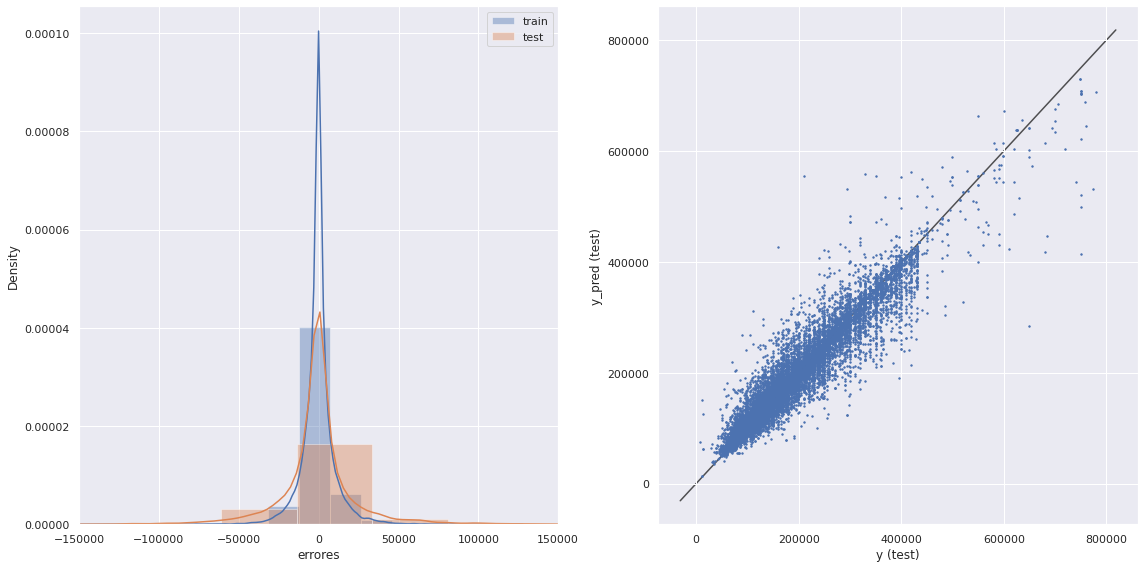

In [ ]:
# Graficando la distribución de errores

plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
sns.distplot(y_train - prediction_train, bins = 15, label = 'train')
sns.distplot(y_test - prediction_test, bins = 15, label = 'test')
plt.xlim(-150000, 150000)
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,prediction_test, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

### B.4 Análisis de resultados

En la parte B se aplicaron dos modelos avanzados, uno de regresión lineal y otro de Random Forest: 

1. Regresión lineal con atributos polinómicos y regularización Ridge con validación cruzada
1. Random Forest con optimización de hiperparámetros con Random Search

En el caso 1 el menor error (RMSE = 43532.84) se obtuvo usando el modelo con atributos polinómicos de grado 3 y Ridge con alpha = 0.01, el cual tiene un mejor desempeño que la regresión lineal benchmark (RMSE = 50134.18), pero aun así sigue siendo insuficiente ante los modelos KNN y arbol de decisión de la parte A que arrojaron respectivamente RMSE de 42097.63 y 35072.77.

Para el caso 2, se realizó un Random Forest con optimización de hiperparámetros y validación cruzada a través del método Random Search. El modelo con el menor error tuvo los siguientes hiperparámetros: n_estimators = 1000, max_depth = 500 obteniéndose un RMSE = 26272.55, representando una mejora en relación a los modelos de la parte A y al modelo avanzado de regresión lineal.

Por lo tanto, el modelo que elegiría para el análisis del dataset de Properati es el Random Forest con Random Search. Permite obtener un menor RMSE que los demás modelos y evita tener un elevado número de columnas, como podría pasar en la regresión lineal con atributos polinómicos. Además, el Random Forest representa una evolución conceptual con respecto a un arbol de decisión simple como el que se realizó en la Parte A.


## Parte C - Interpretación de Modelos

A continuación presentaremos con análisis más detallado de los dos modelos avanzados realizados en la parte B, con sus características particulares y puntos de mejora

### C.1 Regresión lineal

El modelo de regresión lineal con la mejor métrica fue el Ridge con atributos polinómicos de grado 3. Este modelo aumentó significativamente el número de features del dataset original de 10, pasando a tener 286. En este caso podemos observar cual fue la influencia de la regularización Ridge, comparando el modelo obtenido con una regresión lineal con atributos polinómicos grado de 3 sin regularización:

In [ ]:
# Se define la regresion lineal "rl_no_reg" 

rl_no_reg = LinearRegression()

In [ ]:
# Se entrena la regresión con atributos polinómicos de grado 3

rl_no_reg.fit(X_train_3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Se obtienen las predicciones correspondientes para los conjuntos train y test

y_train_pred_no_reg = rl_no_reg.predict(X_train_3)
y_test_pred_no_reg = rl_no_reg.predict(X_test_3)

In [ ]:
#Se calculan los valores de RMSE para cada conjunto

rmse_train_no_reg = np.sqrt(mean_squared_error(y_train, y_train_pred_no_reg))
rmse_test_no_reg = np.sqrt(mean_squared_error(y_test, y_test_pred_no_reg))
print(f'Raíz del error cuadrático medio en Train: {rmse_train_no_reg}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test_no_reg}')

Raíz del error cuadrático medio en Train: 48303.146610670454
Raíz del error cuadrático medio en Test: 51081.02909221542


El modelo de regresión lineal sin regularización Ridge arroja un RMSE = 51081.02, mientras que en la Parte B usando Ridge se obtuvo un RMSE = 43532.84. Aquí se evidencia la importancia de contar con un mecanismo de regularización, el cual en este caso disminuyó el error en aproximadamente 14.8%. Un punto de mejora para este análisis sería evaluar con atributos polinómicos de mayor grado o a través del método Lasso.

En cuanto a la distribución de errores para el modelo Ridge de atributos polinómicos de grado 3 se observó que posee distribución normal, con más cantidad de valores concentrados en el medio que para las otras regresiones lineales, es decir en la zona del histograma donde el valor del error es menor. El gráfico de y_test(pred) vs y_test muestra que desde los precios más bajos hasta 250000 es donde se encuentran las mejores predicciones, pero para precios superiores se empieza a presentar mayor cantidad de errores elevados.

Los modelos Ridge de grado 2 y 3 presentan baja varianza y alto sesgo, ya que sus errores en los sets train y test son similares pero aun tienen errores altos. Sin embargo el peor desempeño lo muestra el modelo Ridge con atributos polinómicos de grado 4, presentando alta varianza y alto sesgo debido a que los errores en train y test son altos y además no son similares. 

Se puede hacer una estimación numérica de sesgo y varianza, utilizando la clase "bias_variance_decomp" de la librería mlxtend. Se evidencia como el modelo Ridge de grado 4 tiene mucho más sesgo y varianza que los modelos Ridge de grado 2 y 3

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
# MSE, sesgo y varianza para el modelo Ridge con atributos polinómicos de grado 2

mse, sesgo, var = bias_variance_decomp(Ridge_poly_2 , X_train_2, y_train.values, X_test_2, y_test.values, loss='mse', num_rounds=10, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Sesgo: %.3f' % sesgo)
print('Varianza: %.3f' % var)

MSE: 2047506007.538
Sesgo: 2040678693.606
Varianza: 6827313.932


In [ ]:
# MSE, sesgo y varianza para el modelo Ridge con atributos polinómicos de grado 3

mse, sesgo, var = bias_variance_decomp(Ridge_poly_3 , X_train_3, y_train.values, X_test_3, y_test.values, loss='mse', num_rounds=10, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Sesgo: %.3f' % sesgo)
print('Varianza: %.3f' % var)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.38948e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.04456e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.21272e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.45148e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.27056e-22): result may not be accurate.
  overwrite_a=True).T


MSE: 1938667515.008
Sesgo: 1905465965.545
Varianza: 33201549.463


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.6263e-22): result may not be accurate.
  overwrite_a=True).T


In [ ]:
# MSE, sesgo y varianza para el modelo Ridge con atributos polinómimcos de grado 4

mse, sesgo, var = bias_variance_decomp(Ridge_poly_4 , X_train_4, y_train.values, X_test_4, y_test.values, loss='mse', num_rounds=10, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Sesgo: %.3f' % sesgo)
print('Varianza: %.3f' % var)

MSE: 3253936170.225
Sesgo: 2393862516.078
Varianza: 860073654.147


### C.2 Random Forest

En la parte B se optimizaron los hiperparámetros del Random Forest, a través de la técnica de Random Search. Seleccionamos esta técnica porque tiene la ventaja de ser computacionalmente más eficiente que el Grid Search.

Una característica resaltante del Random Forest es que nos permite identificar cuales son los features más importantes a la hora de ejecutar la regresión. A continuación mostramos para el Random Forest hallado con los hiperparámetros n=estimators=1000, max_depth=500 cuales fueron estos features

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000,max_depth=500, random_state=42)

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=500, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
rf_reg.feature_importances_

array([0.16828735, 0.0882261 , 0.00900775, 0.00708476, 0.02276537,
       0.46654437, 0.22670414, 0.0011281 , 0.00484966, 0.0054024 ])

Text(0.5, 0, 'Importancia de los features en el Random Forest obtenido')

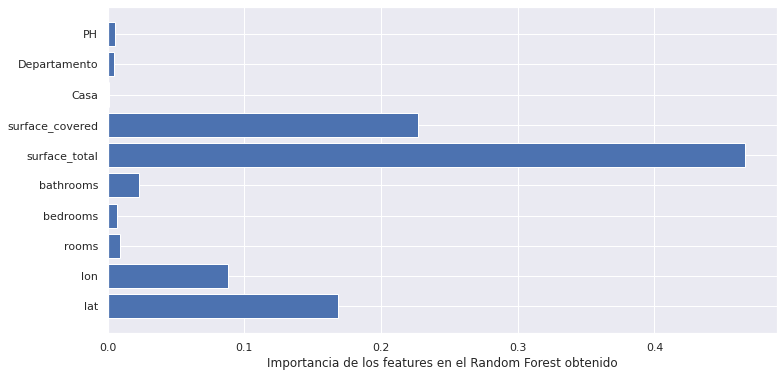

In [ ]:
plt.figure(figsize = (12,6))
plt.barh(['lat','lon','rooms','bedrooms','bathrooms','surface_total','surface_covered',
                                     'Casa','Departamento','PH'], rf_reg.feature_importances_)
plt.xlabel("Importancia de los features en el Random Forest obtenido")

Se observa que los features más importantes son surface_total, surface_covered, lat y lon. Para los features de superficie total y cubierta esto coincide con lo esperado ya que en la parte A eran los que tenían un valor más alto en la matriz de correlación. Sin embargo la latitud y longitud tenían menos correlación que rooms, bedrooms y bathrooms, aun así resultan tener mayor importancia para la regresión en el Random Forest.

En cuanto a la distribución de errores se observa una distribución normal con una curva más angosta que los métodos de regresión lineal, es decir que la cantidad de errores con valores elevados es menor. El gráfico de y_test(pred) vs y_test muestra que desde los precios más bajos hasta 400000 es donde se encuentran las mejores predicciones, pero para precios superiores se empieza a presentar mayor cantidad de errores elevados.

El modelo presenta menor sesgo que los modelos de regresion lineal de la parte B y menor varianza que el modelo Ridge de grado 4, aunque se sigue observando que la mayor parte del error total proviene del sesgo y no de la varianza.

In [ ]:
# MSE, sesgo y varianza para el modelo Random Forest con n=estimators=1000, max_depth=500

mse, sesgo, var = bias_variance_decomp(rf_reg , X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=10, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Sesgo: %.3f' % sesgo)
print('Varianza: %.3f' % var)

MSE: 841523032.236
Sesgo: 738265429.335
Varianza: 103257602.901


### C.3 Conclusiones

1. En la parte A se logró mejorar el desempeño de los modelos de árbol de decisión y k vecinos más cercanos a través de la transformación de datos (eliminación de outliers, encoding y escalado). Esta mejora se evidenció a través de la disminución del valor de RMSE.

1. Se desarrollaron varios modelos de regresión lineal, obteniendo el menor valor de RMSE para el modelo con atributos polinómicos de grado 3 y regularización Ridge. Así mismo se comprobó y cuantificó el efecto de disminución del RMSE causado por la aplicación de la regularización en una regresión lineal.

1. Se realizó un modelo de Random Forest con optimización de hiperparámetros y validación cruzada por Random Search. El mejor Random Forest tuvo los hiperparámetros n_estimators = 1000 y max_depth = 500 y permitió obtener un valor de RMSE menor al obtenido a través de las regresiones lineales y también menor a los modelos de la parte A. 

1. El modelo de Random Forest presentó una capacidad de predecir adecuadamente en un rango de precios mayor que los modelos de regresión lineal.

1. Los datos nulos del dataset de Properati fueron eliminados del análisis. Un punto de mejora posterior sería aplicar un proceso de imputación de dichos valores.

1. En los modelos de regresión lineal y random forest obtenidos se observó que la mayor parte del error total proviene del sesgo y no de la varianza, por lo que existe la posibilidad de aplicar metodologías para mejorar el trade off sesgo varianza: ampliar la búsqueda de hiperparámetros por Grid Search y aplicar modelos más complejos como los métodos de bagging y boosting.



## Parte D - Desafío Opcional

Se realizará el desafío opcional de aplicar Clustering en el dataset, usando el dataframe "df_new", el cual posee la columna property_type antes de haber sido transformada por one hot encoding. Para fines de visualización en la variable X sólo se utilizarán las columnas surface_total y surface_covered y la variable objetivo Y será property_type.



In [ ]:
df_new

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...,...
146543,-34.581699,-58.433547,3.0,2.0,2.0,85.0,81.0,225000.0,Departamento
146544,-34.587152,-58.437724,3.0,2.0,2.0,120.0,82.0,430000.0,Departamento
146545,-34.581425,-58.442707,3.0,2.0,2.0,88.0,82.0,399000.0,Departamento
146549,-34.576573,-58.434394,3.0,2.0,1.0,84.0,84.0,178000.0,PH


Graficamos un scatter plot de surface_covered vs surface_total resaltando los 3 tipos de propiedades existentes

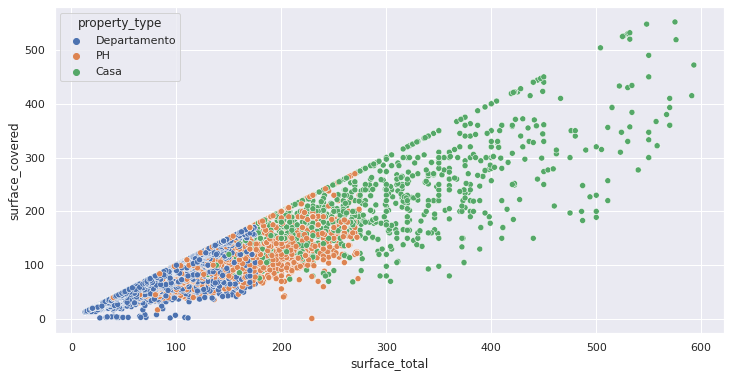

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = df_new.surface_total, y = df_new.surface_covered, hue = df_new.property_type)
plt.show()

Se definen las variables X y la variable y

In [ ]:
cols = ["surface_total","surface_covered"]
X= df_new[cols]
y= df_new.property_type

Se importa la librería para realizar el proceso de clustering a través del método K means

In [ ]:
from sklearn.cluster import KMeans

Se entrena el objeto kmeans definido para identificar tres clusters. De esta forma podremos ver si el clustering es capaz de hacer la agrupación que represente los tres tipos de propiedades como en la gráfica anterior

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Se obtienen las etiquetas y los centroides de cada cluster

In [ ]:
etiquetas = kmeans.labels_
print(etiquetas.shape)

(67078,)


In [ ]:
centros= kmeans.cluster_centers_
print(centros)

[[ 55.12212449  49.61829753]
 [118.17281532 101.00348242]
 [291.94871795 218.52279202]]


En el siguiente scatter plot se presentan los tres clusters obtenidos por k means con sus etiquetas 0, 1 y 2. Se observa la correspondencia existente entre estos clusters y los tipos de propiedades Departamento, PH y Casa 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


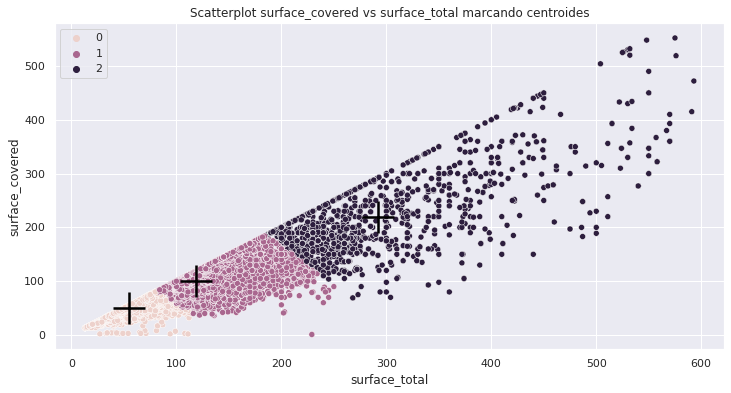

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(X.surface_total,X.surface_covered, hue = etiquetas)
sns.scatterplot(centros[:, 0], centros[:, 1],color='black', marker="+", s=1000)
plt.title('Scatterplot surface_covered vs surface_total marcando centroides')
plt.show()

Con respecto a los centroides obtenidos, se puede observar que los tipos de propiedades más similares entre sí en términos de superficie total y superficie cubierta son los Departamentos (etiqueta 0) y PH (etiqueta 1) ya que tienen la menor distancia entre sí

A continuación se le asignan los números 0, 1 y 2 a los tres tipos de propiedades del dataframe "df_new", para hacer una comparación entre las etiquetas reales y las predichas

In [ ]:
y=df_new['property_type'].map({'Departamento': 0., "PH":1, "Casa":2})


Finalmente creamos la matriz de confusión para comparar las etiquetas reales con las predichas por k means

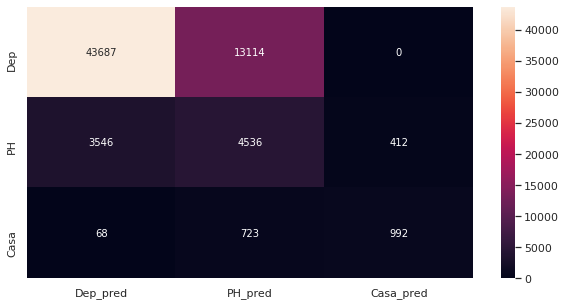

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, etiquetas)
df_cm = pd.DataFrame(cm, index = [i for i in ['Dep','PH','Casa']],
                  columns = [i for i in ['Dep_pred','PH_pred','Casa_pred']])
plt.figure(figsize = (10,5))
sns.heatmap(df_cm, annot=True, fmt="d")

Con esta matriz obtenemos el porcentaje de etiquetas asignadas correctamente: Para un total de 56831 departamentos se etiquetaron correctamente 43687 (76.87%) e incorrectamente 13144 (23.13%). En el caso de los PH, para un total de 8494 se etiquetaron correctamente 4536 (53.40%) e incorrectamente 3958 (46.60%). Para las casas se identificaron correctamente 992 (55.63%) e incorrectamente 791 (44.37%) de un total de 1783

## Anexo

In [ ]:
# Se instaló actualización de la librería mlxtend para usar la clase bias_variance_decomp

%pip install mlxtend  --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.6/dist-packages (0.18.0)
